In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn import svm

#### Generating the data

In [2]:
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,600,1)])
np.random.seed(10) #Setting seed for reproducability
y1 = np.sin(x) + np.random.normal(0,0.15,len(x))
y2 = np.cos(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y1,y2]),columns=['x','y1','y2'])
X=np.vstack((np.vstack((x,y1)).T,np.vstack((x,y2)).T))
y=np.ravel(np.vstack((np.ones((len(y1),1)),np.ones((len(y2),1))+1)))

#### Create a mesh to plot in

In [16]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h1 = (x_max - x_min)/100
h2=(y_max -y_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h1),np.arange(y_min, y_max, h2))
X_plot=np.c_[xx.ravel(),yy.ravel()]

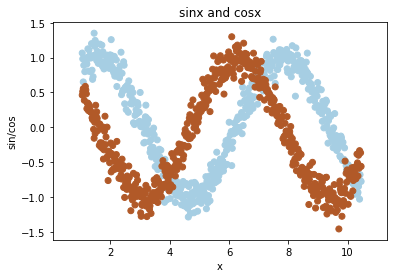

In [20]:
#plotting the data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('sin/cos')
plt.xlim(xx.min(), xx.max())
plt.title('sinx and cosx')
plt.show()

#### Use SVM with radial kernel

In [21]:
svc=svm.SVC(kernel='rbf').fit(X,y)
Z=svc.predict(X_plot)
Z=Z.reshape(xx.shape)

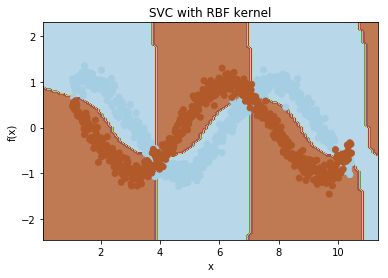

In [25]:
#plotting the result
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')
plt.show()

#### Use SVM with sigmoid kernel

In [26]:
svc=svm.SVC(kernel='sigmoid').fit(X,y)
Z=svc.predict(X_plot)
Z=Z.reshape(xx.shape)

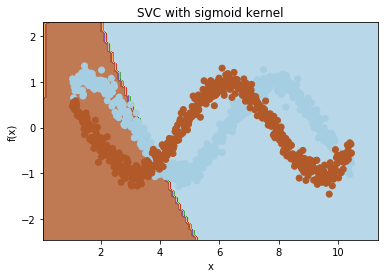

In [30]:
#plotting the result
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with sigmoid kernel')
plt.show()

#### Use SVM with poly(degree=3) kernel

In [31]:
svc=svm.SVC(kernel='poly',degree=3).fit(X,y)
Z=svc.predict(X_plot)
Z=Z.reshape(xx.shape)

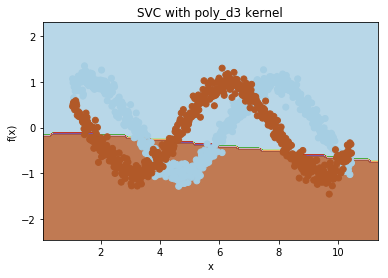

In [32]:
#plotting the result
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with poly_d3 kernel')
plt.show()

#### Use SVM with poly(degree=5) kernel

In [33]:
svc=svm.SVC(kernel='poly',degree=5).fit(X,y)
Z=svc.predict(X_plot)
Z=Z.reshape(xx.shape)

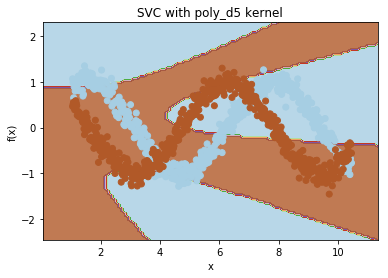

In [34]:
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with poly_d5 kernel')
plt.show()